<a href="https://colab.research.google.com/github/Demesmaeker/DL_computer_vision_Pneumonia/blob/main/00_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre-Processing


In [4]:
root_dir = "./drive/MyDrive/Collab_datas/"
data_dir = root_dir + "chest_xray/"

training_dir =  data_dir + "train/"
test_dir = data_dir + "test/"
val_dir = data_dir + "val/"

training_dir

'./drive/MyDrive/Collab_datas/chest_xray/train/'

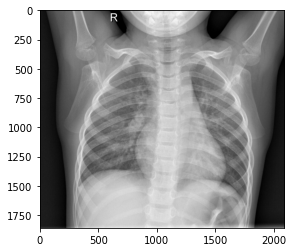

In [5]:
# Show the image
img = cv2.imread(training_dir + "NORMAL/IM-0115-0001.jpeg")
plt.imshow(img)

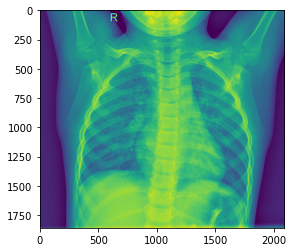

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [7]:
gray

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

In [8]:
gray.max()

255

In [9]:
def list_folders(startpath):
    """Print the folder sutructure of a given folder"""
    
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))

In [10]:
list_folders(training_dir)

/
NORMAL/
PNEUMONIA/


In [11]:
cat = [['NORMAL'],
       ['PNEUMONIA']]

In [84]:
img_size = (150, 150)

In [85]:
x_train = []
y_train = []
 
for i in range(len(cat)):
    print(f'{round(((i + 1) / (len(cat)) * 100))}%')
    for elem in os.listdir(training_dir + cat[i][0]):
        if elem == '.DS_Store':
          continue
        img = cv2.imread(training_dir+cat[i][0]+ "/" + elem)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray colorisationprint(elem)
        img_gray = cv2.resize(img_gray, img_size)
        x_train.append(img_gray)
        y_train.append(i)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


50%
100%


In [86]:
x_test = []
y_test = []
 
for i in range(len(cat)):
    print(f'{round(((i + 1) / (len(cat)) * 100))}%')
    for elem in os.listdir(test_dir + cat[i][0]):
        if elem == '.DS_Store':
          continue
        img = cv2.imread(test_dir+cat[i][0]+ "/" + elem)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray colorisationprint(elem)
        img_gray = cv2.resize(img_gray, img_size)
        x_test.append(img_gray)
        y_test.append(i)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


50%
100%


In [87]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5216, 150, 150) (630, 150, 150) (5216,) (630,)


In [ ]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=360,
#     horizontal_flip=True,
#     vertical_flip=True,
    
#     ).flow_from_directory(
#         training_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [ ]:
# train_iter = iter(train_datagen)
# train = train_iter.next()
# train

In [ ]:
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
#         test_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [ ]:
# val_datagen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
#         val_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [17]:
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [30]:
input_size = 100
kernel_size = (5,5)
output_size = len(cat)

In [88]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, len(cat))
y_test = to_categorical(y_test, len(cat))

In [89]:
x_train = np.stack(x_train).reshape(len(x_train), 150, 150, 1)
x_test = np.stack(x_test).reshape(len(x_test), 150, 150, 1)

In [90]:
np.save(f'./drive/MyDrive/Collab_datas/chest_xray_sets/x_train.npy', x_train)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray_sets/y_train.npy', y_train)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray_sets/x_test.npy', x_test)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray_sets/y_test.npy', y_test)

In [91]:
x_train = np.load(f'./drive/MyDrive/Collab_datas/chest_xray_sets/x_train.npy', allow_pickle=True)
y_train = np.load(f'./drive/MyDrive/Collab_datas/chest_xray_sets/y_train.npy', allow_pickle=True)
x_test = np.load(f'./drive/MyDrive/Collab_datas/chest_xray_sets/x_test.npy', allow_pickle=True)
y_test = np.load(f'./drive/MyDrive/Collab_datas/chest_xray_sets/y_test.npy', allow_pickle=True)

# Model V1 

Img size : 100 x 100

Kernel size : 5 x 5

### Model creation

In [35]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, kernel_size, activation='relu', ))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(output_size, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                495648    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
163/163 [==============================] - 2s 10ms/step - loss: 3.8826 - accuracy: 0.7022 - val_loss: 0.5639 - val_accuracy: 0.7302
Epoch 2/10
163/163 [==============================] - 1s 9ms/step - loss: 0.4313 - accuracy: 0.8169 - val_loss: 0.6659 - val_accuracy: 0.6333
Epoch 3/10
163/163 [==============================] - 1s 8ms/step - loss: 0.4418 - accuracy: 0.7998 - val_loss: 0.5995 - val_accuracy: 0.6286
Epoch 4/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3289 - accuracy: 0.8457 - val_loss: 0.6768 - val_accuracy: 0.8032
Epoch 5/10
163/163 [==============================] - 1s 8ms/step - loss: 0.2603 - accuracy: 0.9021 - val_loss: 0.8359 - val_accuracy: 0.7429
Epoch 6/10
163/163 [==============================] - 1s 9ms/step - loss: 0.2341 - accuracy: 0.9064 - val_loss: 1.5006 - val_accuracy: 0.7286
Epoch 7/10
163/163 [==============================] - 1s 8ms/step - loss: 0.1762 - accuracy: 0.9213 - val_loss: 1.3978 - val_accuracy: 0.7413
Epoch

### Model evaluation

20/20 - 0s - loss: 1.4380 - accuracy: 0.7317


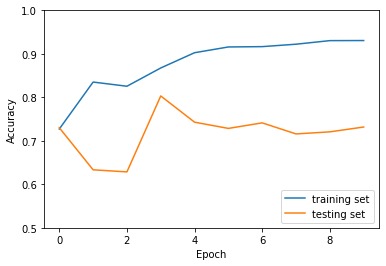

In [37]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 73.17460317460316
That means that out of 630 test samples, this model got 461 correct and 169 incorrect


# Model V2

Img_size : 100 x 100

Kernel size : 3 x 3

### Model creation

In [51]:
kernel_size = (3, 3)

In [52]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, kernel_size, activation='relu', ))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(output_size, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                294928    
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)               

In [53]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
163/163 [==============================] - 2s 9ms/step - loss: 4.4540 - accuracy: 0.7271 - val_loss: 0.5561 - val_accuracy: 0.6190
Epoch 2/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3992 - accuracy: 0.7366 - val_loss: 0.5188 - val_accuracy: 0.6190
Epoch 3/10
163/163 [==============================] - 1s 8ms/step - loss: 0.4057 - accuracy: 0.7301 - val_loss: 0.9130 - val_accuracy: 0.6190
Epoch 4/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3660 - accuracy: 0.7393 - val_loss: 1.1008 - val_accuracy: 0.6587
Epoch 5/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3475 - accuracy: 0.7817 - val_loss: 0.9699 - val_accuracy: 0.7571
Epoch 6/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3330 - accuracy: 0.8009 - val_loss: 1.3638 - val_accuracy: 0.7397
Epoch 7/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3483 - accuracy: 0.7773 - val_loss: 0.8013 - val_accuracy: 0.7778
Epoch 

### Model evaluation

20/20 - 0s - loss: 1.3955 - accuracy: 0.7857


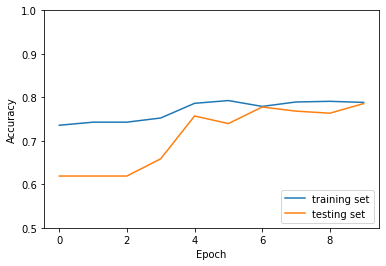

In [54]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 78.57142857142857
That means that out of 630 test samples, this model got 495 correct and 135 incorrect


# Model V3

### Model creation

In [79]:
kernel_size = (3, 3)
input_size = 150

Model pompé d'internet

In [94]:
model = models.Sequential()

model.add(layers.Conv2D(16, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.Conv2D(16, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(32, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(32, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(64, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(64, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(128, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(128, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.SeparableConv2D(256, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(256, kernel_size, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())


model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))


model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 146, 146, 16)      2320      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 73, 73, 16)        0         
_________________________________________________________________
separable_conv2d_45 (Separab (None, 71, 71, 32)        688       
_________________________________________________________________
separable_conv2d_46 (Separab (None, 69, 69, 32)        1344      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
separable_conv2d_47 (Separab (None, 32, 32, 64)      

In [95]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train[:,0], epochs=10, 
                    validation_data=(x_test, y_test[:,0]))

Epoch 1/10
163/163 [==============================] - 11s 59ms/step - loss: 0.6039 - accuracy: 0.7341 - val_loss: 0.6946 - val_accuracy: 0.6190
Epoch 2/10
163/163 [==============================] - 10s 61ms/step - loss: 0.5859 - accuracy: 0.7344 - val_loss: 0.6921 - val_accuracy: 0.6190
Epoch 3/10
163/163 [==============================] - 10s 61ms/step - loss: 0.5789 - accuracy: 0.7380 - val_loss: 0.6807 - val_accuracy: 0.6190
Epoch 4/10
163/163 [==============================] - 10s 60ms/step - loss: 0.4817 - accuracy: 0.7700 - val_loss: 0.4689 - val_accuracy: 0.8159
Epoch 5/10
163/163 [==============================] - 10s 60ms/step - loss: 0.2908 - accuracy: 0.8778 - val_loss: 0.5172 - val_accuracy: 0.8397
Epoch 6/10
163/163 [==============================] - 10s 59ms/step - loss: 0.1874 - accuracy: 0.9317 - val_loss: 0.7643 - val_accuracy: 0.8270
Epoch 7/10
163/163 [==============================] - 9s 55ms/step - loss: 0.1544 - accuracy: 0.9484 - val_loss: 0.6335 - val_accuracy: 

### Model evaluation

20/20 - 0s - loss: 0.6588 - accuracy: 0.8222


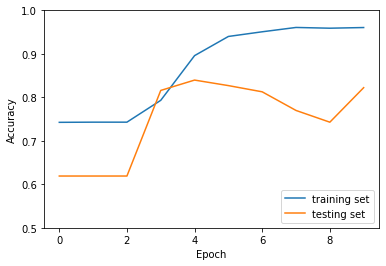

In [96]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test[:,0], verbose=2)

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)

print("Accuracy: %", accuracy_score(y_test[:, 0], np.round(predictions)) * 100)

correct_preds = (y_test[:, 0] == np.round(predictions))
print("That means that out of", y_test[:, 0].shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 82.22222222222221
That means that out of 630 test samples, this model got 222000 correct and 174900 incorrect


In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(x_test)

acc = accuracy_score(y_test[:,0], np.round(preds))*100
cm = confusion_matrix(y_test[:,0], np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[375  15]
 [ 97 143]]

TEST METRICS ----------------------
Accuracy: 82.22222222222221%
Precision: 90.50632911392405%
Recall: 59.583333333333336%
F1-score: 71.85929648241206

TRAIN METRIC ----------------------
Train acc: 96.05


# Model V4

### Model creation

In [ ]:
kernel_size = (3, 3)
input_size = 150

Model toujours pompé d'internet

In [111]:
model = models.Sequential()

model.add(layers.Conv2D(16, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.Conv2D(16, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(32, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(32, kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(64, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(64, kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.SeparableConv2D(128, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(128, kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.SeparableConv2D(256, kernel_size, activation='relu'))
model.add(layers.SeparableConv2D(256, kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())


model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))


model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 146, 146, 16)      2320      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 73, 73, 16)        0         
_________________________________________________________________
separable_conv2d_53 (Separab (None, 71, 71, 32)        688       
_________________________________________________________________
separable_conv2d_54 (Separab (None, 69, 69, 32)        1344      
_________________________________________________________________
batch_normalization (BatchNo (None, 69, 69, 32)        128       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 34, 34, 32)      

In [112]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train[:,0], epochs=10, 
                    batch_size = 32,
                    validation_data=(x_test, y_test[:,0]))

Epoch 1/10
163/163 [==============================] - 11s 61ms/step - loss: 0.3773 - accuracy: 0.8249 - val_loss: 1.0665 - val_accuracy: 0.6190
Epoch 2/10
163/163 [==============================] - 10s 60ms/step - loss: 0.1282 - accuracy: 0.9566 - val_loss: 1.3664 - val_accuracy: 0.6190
Epoch 3/10
163/163 [==============================] - 10s 61ms/step - loss: 0.1274 - accuracy: 0.9549 - val_loss: 2.0391 - val_accuracy: 0.6190
Epoch 4/10
163/163 [==============================] - 10s 63ms/step - loss: 0.0905 - accuracy: 0.9689 - val_loss: 2.1243 - val_accuracy: 0.6206
Epoch 5/10
163/163 [==============================] - 10s 59ms/step - loss: 0.0938 - accuracy: 0.9685 - val_loss: 0.5560 - val_accuracy: 0.8000
Epoch 6/10
163/163 [==============================] - 10s 59ms/step - loss: 0.0767 - accuracy: 0.9746 - val_loss: 0.6739 - val_accuracy: 0.7857
Epoch 7/10
163/163 [==============================] - 10s 59ms/step - loss: 0.0609 - accuracy: 0.9794 - val_loss: 2.9767 - val_accuracy:

### Model evaluation

20/20 - 0s - loss: 2.8362 - accuracy: 0.6317


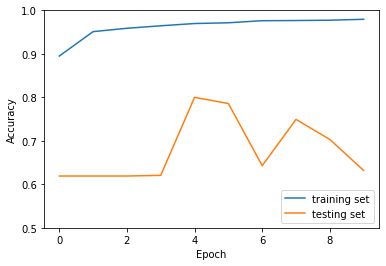

In [113]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test[:,0], verbose=2)

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)

print("Accuracy: %", accuracy_score(y_test[:, 0], np.round(predictions)) * 100)

correct_preds = (y_test[:, 0] == np.round(predictions))
print("That means that out of", y_test[:, 0].shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 63.17460317460317
That means that out of 630 test samples, this model got 7640.625 correct and 4762.5 incorrect


In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(x_test)

acc = accuracy_score(y_test[:,0], np.round(preds))*100
cm = confusion_matrix(y_test[:,0], np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[390   0]
 [232   8]]

TEST METRICS ----------------------
Accuracy: 63.17460317460317%
Precision: 100.0%
Recall: 3.3333333333333335%
F1-score: 6.451612903225808

TRAIN METRIC ----------------------
Train acc: 97.95
